In [2]:
%pylab inline
import os, re, json
from collections import OrderedDict
from scipy import stats

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times'], 'size': 14.5})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

Populating the interactive namespace from numpy and matplotlib


In [27]:
D = 4
DPI = 100

In [28]:
data = {}
for r, c, s, ratio in map(lambda x: x.strip().split(), open('../data/reads_%d.dat' % D).readlines()):
    r = int(r)
    if r not in data:
        data[r] = []
    data[r] += [D * r / float(ratio)]

In [29]:
for k in data.keys():
    v = data[k]
    data[k] = {
        'min': np.min(v),
        'mean': np.mean(v),
        'median': np.median(v),
        'std': np.std(v),
        'max': np.max(v),
    }

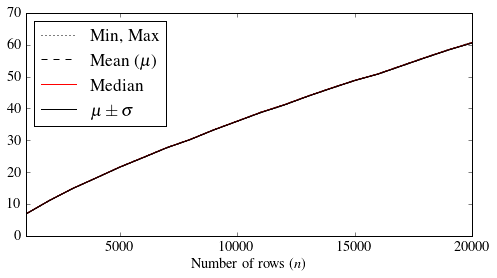

In [30]:
def prune(x):
    if D == 2:
        return x
    else:
        return x
    
def extract_in_order(field):
    return np.array(map(lambda x: x[1][field], prune(sorted(data.items()))))
mins = extract_in_order('min')
maxs = extract_in_order('max')
medians = extract_in_order('median')
stds = extract_in_order('std')
means = extract_in_order('mean')
xs = prune(sorted(data.keys()))

plt.figure(figsize = (8,4.0))
plt.plot(xs, mins, 'k', ls='dotted', label = 'Min, Max')
plt.plot(xs, maxs, 'k', ls='dotted')
plt.plot(xs, means, '--k', label='Mean ($\\mu$)')
plt.plot(xs, medians, 'r', label='Median')
plt.plot(xs, list(means - stds), 'k', label='$\\mu \\pm \\sigma$')
plt.xlim(xmin = min(xs), xmax = max(xs))
#plt.ylim(ymin = .3, ymax = 7)

plt.xlabel("Number of rows ($n$)")

plt.fill_between(map(float,xs), list(means - stds), list(means + stds), facecolor = '#DDDDDD')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc = 2, numpoints = 1)

savefig('slices_reads_expanded_%d.pdf' % D, dpi = DPI, bbox_inches='tight')